In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as ppy

%matplotlib inline

In [0]:
#geting the fashion_mnist data set into a variable
mnist = keras.datasets.mnist

In [4]:
(mnist_train,mnist_train_label),(mnist_test,mnist_test_label) = mnist.load_data()

#normalising by dividing the train and test data by maximum number of pixles = 255
mnist_train = mnist_train/255 
mnist_test = mnist_test/255

11493376/11490434 [==============================] - 0s 0us/step


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

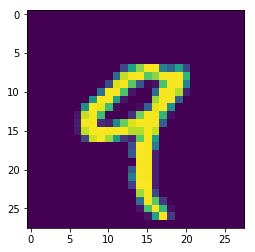

In [6]:
#visualising the data
print(mnist_train[4])
ppy.imshow(mnist_train[4])

In [0]:
#we define our model here with 10 ouput classes
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape =(28,28)),
                                  tf.keras.layers.Dense(256, activation = tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [0]:
model.compile(optimizer = 'adam',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])  

In [0]:
class my_Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs= {}):
    if(logs.get('acc')>0.99):
      print("\n reached desired accuracy, terminating training \n")
      self.model.stop_training = True
      

In [11]:
callbacks = my_Callback()
model.fit(mnist_train,mnist_train_label,epochs = 10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2231 - acc: 0.9352
Epoch 2/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0925 - acc: 0.9718
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0609 - acc: 0.9810
Epoch 4/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0445 - acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0331 - acc: 0.9893
Epoch 6/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.0239 - acc: 0.9923
 reached desired accuracy, terminating training 

60000/60000 [==============================] - 6s 108us/sample - loss: 0.0239 - acc: 0.9923


In [12]:
model.evaluate(mnist_test,mnist_test_label)  

10000/10000 [==============================] - 0s 47us/sample - loss: 0.0821 - acc: 0.9771


[0.08211755447458127, 0.9771]

In [13]:
classifications = model.predict(mnist_test)
print(classifications[0])
print(mnist_test_label[0])

[9.0728515e-11 1.5940527e-09 1.3350837e-08 3.9752307e-05 2.2763445e-12
 1.8754573e-09 4.5027109e-14 9.9996030e-01 2.0949101e-10 1.0948886e-08]
7
